# Case Study on Indian Startups
Detailed analysis of the Indian Startups for interpretation of trends and patterns to facilitate selection of proper city, useful investors, funding type etc for different startups.

# ---------------------------------------------------------------------------------------------------------------

Problem_statement-1 Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.

Print year-wise total number of fundings also. Print years in ascending order.

In [3]:
# Open and read data file as specified in the question
# Print the required output in given format

import csv
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv')
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    
    year=[]
    funding=[]
    for row in file_data:
        year.append(row['Date'])
        funding.append(row['AmountInUSD'])
        
n_year = []
d={}

for ele in range(len(year)):
    if '2017' in year[ele]:
        key = 2017
        d[key] = d.get(key,0) + 1
            
    if '2016' in year[ele]:
        key = 2016
        d[key] = d.get(key,0) + 1
    if '2015' in year[ele]:
        key = 2015
        d[key] = d.get(key,0) + 1
        
y=sorted(d.items())

years= []
jobs = []

for ele in y:
    years.append(ele[0])
    jobs.append(ele[1])
for ele in range(len(years)):
    print(years[ele],jobs[ele])



2015 936
2016 993
2017 443


# ---------------------------------------------------------------------------------------------------------------

Problem statement -2 Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

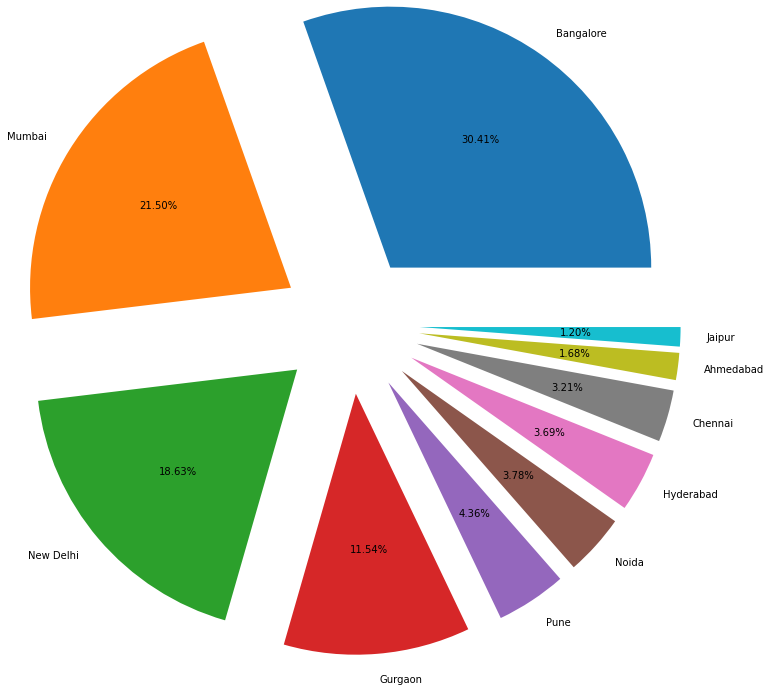

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [4]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import csv
with open('startup_funding.csv') as file_obj:
    
    
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    city=[]
    for row in file_data:
        city.append(row['CityLocation'])
    np_city=np.array(city)
    np_city=np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    
    for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()
    
    dic=dict()
    for i in np_city:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    
    xaxis=[]
    yaxis=[]
    
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    np_xaxis=np.array(xaxis)
    np_yaxis=np.array(yaxis)
    
    np_xaxis=np_xaxis[np.argsort(np_yaxis)]
    np_yaxis=np.sort(np_yaxis)
    
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

    plt.pie(np_yaxis, labels=np_xaxis, autopct='%.2f%%', radius=3, explode=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])
    plt.show()
    
    for i in range(len(np_xaxis)):
        print(np_xaxis[i], np_yaxis[i])

        

Problem_statement-3 Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv('startup_funding.csv')
df.dropna(subset=['CityLocation'],inplace=True)

def fun(s):
    li=[ele.strip() for ele in s.split('/')]
    return li[0]
df['CityLocation']=df['CityLocation'].apply(fun)
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x:float(str(x).replace(',','')))

df.CityLocation.replace('bangalore','Bangalore',inplace=True)
df.CityLocation.replace('Delhi','New Delhi',inplace=True)
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
funding_amount=df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=funding_amount.index
amount=funding_amount.values
perc=np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(perc[i],'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# ---------------------------------------------------------------------------------------------------------------

Problem_statement-4 - There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off

In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("startup_funding.csv")
df=data.copy()
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True) 
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True) 
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True) 
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
invest_type=df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
invest=invest_type.index
amount=invest_type.values
perAmount = np.true_divide(amount, amount.sum())*100
for i in range(len(invest)):
    print(invest[i], format(perAmount[i], '.2f'))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


problem_statement -5 Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

In [14]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
#df_start['IndustryVertical'].dropna(inplace=True)
def investmentCheck(x):
    if(x == 'eCommerce') or x=='ECommerce' or x=='ecommerce':
        return 'Ecommerce'
    else :
        return x
df_start['IndustryVertical']=df_start['IndustryVertical'].apply(investmentCheck)
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(5):
    print(city[i],format(perAmount[i],'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


# ---------------------------------------------------------------------------------------------------------------

Problem_statement-6 Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

In [17]:
# Open and read data file as specified in the question
# Print the required output in given 
import pandas as pd
import numpy as np
su=pd.read_csv('startup_funding.csv')
df=su.copy()
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df.AmountInUSD.fillna(0)
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x:float(str(x).replace(',','')))
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
top=df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startups=top.index
for i in range(len(startups)):
    print(startups[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


# ---------------------------------------------------------------------------------------------------------------

Problem_statement-7 Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

In [18]:
# Open and read data file as specified in the question
# Print the required output in given format
import numpy as np
import csv
import operator
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    start_up=[]
    for row in file_data:
        start_up.append(row['StartupName'])
        
    n_startup=np.array(start_up)
    
    d={}
    for i in range(len(n_startup)):
        if 'Olacabs' in n_startup[i] or 'Ola Cabs' in n_startup[i]:
            n_startup[i]='Ola'
        if 'Flipkart.com' in n_startup[i]:
            n_startup[i]='Flipkart'
        if 'Oyo' in n_startup[i] or 'OYO Rooms' in n_startup[i]:
            n_startup[i]='Oyo'
        if 'Paytm Marketplace' in n_startup[i]:
            n_startup[i]='Paytm'
    
    i=0
    d={}
    for ele in n_startup:
        d[ele]=d.get(ele,0) + 1
        
    sorted_d = dict(sorted(d.items(),key=operator.itemgetter(1),reverse=True))
    i=1
    for ele in sorted_d:
        if i==6:
            break
        print(ele,sorted_d[ele])
        i+=1
    
    
    
    
    
    
    
        
        
            

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# ---------------------------------------------------------------------------------------------------------------

Problem_statement 8 - Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

In [19]:
# Open and read data file as specified in the question
# Print the required output in given format
import csv
import numpy as np
import operator
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])
        
        
        

Sequoia Capital 64
